In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Using a multidim sampler

In [2]:
from cosmic.sample.initialbinarytable import InitialBinaryTable
from cosmic.sample.sampler import multidim

In [19]:
InitialBinaries, mass_singles, mass_binaries, n_singles, n_binaries = InitialBinaryTable.sampler('multidim', final_kstar1=[14], final_kstar2=[14], rand_seed=3, nproc=1, SF_start=13700.0, SF_duration=0.0, met=0.02, size=10000)

In [20]:
from cosmic.evolve import Evolve

In [21]:
BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 'bwind': 0.0, 'lambdaf': 0.0, 'mxns': 3.0, 'beta': -1.0, 'tflag': 1, 'acc2': 1.5, 'grflag' : 1, 'remnantflag': 4, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 'sigma': 265.0, 'gamma': -2.0, 'pisn': 45.0, 'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.25, 'ecsn_mlow' : 1.6, 'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 1, 'eddlimflag' : 0, 'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 'ST_cr' : 1, 'ST_tide' : 1, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'kickflag' : 0, 'zsun' : 0.014, 'bhms_coll_flag' : 0, 'don_lim' : -1, 'acc_lim' : -1}

In [22]:
bpp, bcm, initC, kick_info  = Evolve.evolve(initialbinarytable=InitialBinaries, BSEDict=BSEDict)

/home/pranav/miniconda3/envs/cosmic/lib/python3.7/site-packages/cosmic/utils.py:1445: UserWarning: At least one of your initial binaries is starting in Roche Lobe Overflow:
      kstar_1  kstar_2      mass_1     mass_2      porb       ecc  \
87        1.0      1.0   75.410059  45.863243  1.566237  0.002378   
297       1.0      1.0  108.013163  13.544737  1.919807  0.029151   
395       1.0      1.0   78.700652  49.692106  1.733320  0.006642   
435       1.0      1.0   78.297190  40.168769  1.796207  0.025689   
442       1.0      1.0  100.095300  22.859142  1.836653  0.003505   
...       ...      ...         ...        ...       ...       ...   
9311      1.0      1.0   86.512253  19.976270  1.562220  0.004921   
9482      1.0      1.0   56.063016  51.870955  1.723838  0.016232   
9640      1.0      1.0  102.655519  33.997542  2.133164  0.022373   
9835      1.0      1.0   64.994538  60.546305  1.572078  0.020988   
9886      1.0      1.0   80.206960  60.027292  1.774274  0.004576   

In [12]:
bh_index_1 = np.array(bcm[bcm.kstar_1==14.0].index)
bh_final_m1 = np.array(bcm[bcm.kstar_1==14.0].mass_1)

bh_index_2 = np.array(bcm[bcm.kstar_2==14.0].index)
bh_final_m2 = np.array(bcm[bcm.kstar_2==14.0].mass_2)

In [13]:
bh_ini_m1 = []
bh_ini_m2 = []

In [14]:
for indx in bh_index_1:
    bh_ini_m1.append(np.array(bcm[bcm.index==indx].mass_1)[0])
    
for indx in bh_index_2:
    bh_ini_m2.append(np.array(bcm[bcm.index==indx].mass_2)[0])

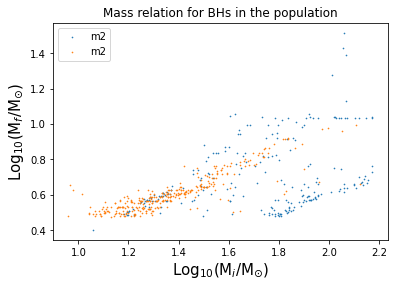

In [18]:
plt.scatter(np.log10(bh_ini_m1),np.log10(bh_final_m1),s=0.4,label="m2")
plt.scatter(np.log10(bh_ini_m2),np.log10(bh_final_m2),s=0.4,label="m2")
plt.xlabel(r'Log$_{10}$(M$_{i}$/M$_{\odot}$)', size=15)
plt.ylabel(r'Log$_{10}$(M$_{f}$/M$_{\odot}$)', size=15)
plt.legend()
plt.title("Mass relation for BHs in the population")
#plt.xlim(1.5,1.8)
#plt.ylim(0.45,0.7)
plt.show()